In [37]:
import numpy as np 
import pandas as pd 

In [38]:
bank = pd.read_csv('bs140513_032310.csv')

In [39]:
bank.shape 

(594643, 10)

In [40]:
bank.head()

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0
3,0,'C1760612790','3','M','28007','M348934600','28007','es_transportation',17.25,0
4,0,'C757503768','5','M','28007','M348934600','28007','es_transportation',35.72,0


In [41]:
print("Dataset Shape = ", bank.shape)
print("Dataset Label = ", bank.fraud.unique())
print('Null Values = ', bank.isnull().sum())

Dataset Shape =  (594643, 10)
Dataset Label =  [0 1]
Null Values =  step           0
customer       0
age            0
gender         0
zipcodeOri     0
merchant       0
zipMerchant    0
category       0
amount         0
fraud          0
dtype: int64


In [42]:
col_summary = pd.DataFrame(bank.columns, columns = ['Column'])
na_list = []
unique_list = []
dtype_list = []

for col in bank.columns:
    na_list.append(bank[col].isna().sum())
    unique_list.append(bank[col].nunique())
    dtype_list.append(bank[col].dtype)
    
col_summary['Missing values'] = na_list
col_summary['Unique values'] = unique_list
col_summary['Data type'] = dtype_list
col_summary

,Column,Missing values,Unique values,Data type
0,step,0,180,int64
1,customer,0,4112,object
2,age,0,8,object
3,gender,0,4,object
4,zipcodeOri,0,1,object
5,merchant,0,50,object
6,zipMerchant,0,1,object
7,category,0,15,object
8,amount,0,23767,float64
9,fraud,0,2,int64


In [43]:
bank.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594643 entries, 0 to 594642
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   step         594643 non-null  int64  
 1   customer     594643 non-null  object 
 2   age          594643 non-null  object 
 3   gender       594643 non-null  object 
 4   zipcodeOri   594643 non-null  object 
 5   merchant     594643 non-null  object 
 6   zipMerchant  594643 non-null  object 
 7   category     594643 non-null  object 
 8   amount       594643 non-null  float64
 9   fraud        594643 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 45.4+ MB


In [44]:
bank.describe()

,step,amount,fraud
count,594643.000000,594643.000000,594643.000000
mean,94.986827,37.890135,0.012108
std,51.053632,111.402831,0.109369
min,0.000000,0.000000,0.000000
25%,52.000000,13.740000,0.000000
50%,97.000000,26.900000,0.000000
75%,139.000000,42.540000,0.000000
max,179.000000,8329.960000,1.000000


In [45]:
bank.corr()  

,step,amount,fraud
step,1.000000,-0.007961,-0.011898
amount,-0.007961,1.000000,0.489967
fraud,-0.011898,0.489967,1.000000


In [46]:
import seaborn as sns
import matplotlib.pyplot as plt  # import visualization module 

In [47]:
%matplotlib inline

**Visualization of fraud transaction**

0    587443
1      7200
Name: fraud, dtype: int64


<AxesSubplot:xlabel='fraud', ylabel='count'>

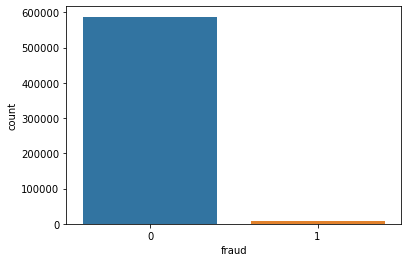

In [48]:
print(bank['fraud'].value_counts())
sns.countplot(x='fraud',data=bank)  # visualization of fraud transactions 

In [49]:
bank.groupby('category')[['amount','fraud']].sum() 

,amount,fraud
category,,
'es_barsandrestaurants',276977.04,120
'es_contents',39424.60,0
'es_fashion',423812.51,116
'es_food',973246.41,0
'es_health',2187979.51,1696
'es_home',329022.30,302
'es_hotelservices',358591.25,548
'es_hyper',280327.63,280
'es_leisure',144166.74,474


In [50]:
# groupby the categories and their respective amount and fraud mean
bank.groupby('category')[['amount','fraud']].mean()

,amount,fraud
category,,
'es_barsandrestaurants',43.461014,0.018829
'es_contents',44.547571,0.000000
'es_fashion',65.666642,0.017973
'es_food',37.070405,0.000000
'es_health',135.621367,0.105126
'es_home',165.670846,0.152064
'es_hotelservices',205.614249,0.314220
'es_hyper',45.970421,0.045917
'es_leisure',288.911303,0.949900


In [51]:
(bank.groupby('age')['fraud'].mean()*100).reset_index().sort_values(by='age' , ascending = False).rename(columns={'fraud':'fraud_percent'})

,age,fraud_percent
7,'U',0.594228
6,'6',0.974826
5,'5',1.095112
4,'4',1.293281
3,'3',1.192815
2,'2',1.251401
1,'1',1.185254
0,'0',1.957586


In [52]:
bank.head()

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0
3,0,'C1760612790','3','M','28007','M348934600','28007','es_transportation',17.25,0
4,0,'C757503768','5','M','28007','M348934600','28007','es_transportation',35.72,0


In [53]:
bank['zipcodeOri'].nunique()

1

In [54]:
bank['zipMerchant'].nunique()

1

In [55]:
bank.drop(['zipcodeOri','zipMerchant'],axis=1,inplace=True)

In [56]:
bank.shape

(594643, 8)

In [57]:
bank.head(3)

,step,customer,age,gender,merchant,category,amount,fraud
0,0,'C1093826151','4','M','M348934600','es_transportation',4.55,0
1,0,'C352968107','2','M','M348934600','es_transportation',39.68,0
2,0,'C2054744914','4','F','M1823072687','es_transportation',26.89,0


**Transformation**

In [58]:
col_categorical = bank.select_dtypes(include= ['object']).columns
for col in col_categorical:
    bank[col] = bank[col].astype('category')
bank[col_categorical] = bank[col_categorical].apply(lambda x: x.cat.codes)
bank.head(5)

,step,customer,age,gender,merchant,category,amount,fraud
0,0,210,4,2,30,12,4.55,0
1,0,2753,2,2,30,12,39.68,0
2,0,2285,4,1,18,12,26.89,0
3,0,1650,3,2,30,12,17.25,0
4,0,3585,5,2,30,12,35.72,0


In [59]:
X = bank.iloc[:,0:7]
y = bank.iloc[:,-1]

In [60]:
X.head()

,step,customer,age,gender,merchant,category,amount
0,0,210,4,2,30,12,4.55
1,0,2753,2,2,30,12,39.68
2,0,2285,4,1,18,12,26.89
3,0,1650,3,2,30,12,17.25
4,0,3585,5,2,30,12,35.72


In [61]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: fraud, dtype: int64

In [62]:
#Set up a standard scaler for the features
from sklearn.preprocessing import StandardScaler
col_names = list(X.columns)
s_scaler = StandardScaler()
X = s_scaler.fit_transform(X)
X = pd.DataFrame(X, columns=col_names) 
X.head()

,step,customer,age,gender,merchant,category,amount
0,-1.860532,-1.545620,0.737975,1.090643,0.714001,0.331405,-0.299276
1,-1.860532,0.599484,-0.759162,1.090643,0.714001,0.331405,0.016067
2,-1.860532,0.204710,0.737975,-0.896279,-0.682938,0.331405,-0.098742
3,-1.860532,-0.330933,-0.010593,1.090643,0.714001,0.331405,-0.185275
4,-1.860532,1.301303,1.486544,1.090643,0.714001,0.331405,-0.019480


In [63]:
X.shape

(594643, 7)

In [64]:
# train_test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

**Oversampling**

In [65]:
print('X_train =', X_train.shape)
print('y_train =', y_train.shape)
print('X_test =', X_test.shape)
print('y_test =', y_test.shape)


X_train = (398410, 7)
y_train = (398410,)
X_test = (196233, 7)
y_test = (196233,)


In [66]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_res,y_res=smote.fit_resample(X_train,y_train)

In [67]:
from collections import Counter
print("Before oversampling: ",Counter(y_train))
print("After oversampling: ",Counter(y_res))

Before oversampling:  Counter({0: 393525, 1: 4885})
After oversampling:  Counter({0: 393525, 1: 393525})


In [68]:
y_res

0         0
1         0
2         0
3         0
4         0
         ..
787045    1
787046    1
787047    1
787048    1
787049    1
Name: fraud, Length: 787050, dtype: int64

In [69]:
X_res

,step,customer,age,gender,merchant,category,amount
0,0.489940,-1.136506,2.235113,-0.896279,0.714001,0.331405,0.008167
1,-0.920343,0.655157,1.486544,1.090643,-0.682938,0.331405,0.152598
2,0.666225,-0.468429,-1.507730,-0.896279,-0.682938,0.331405,0.088955
3,-0.254376,-0.469272,-0.010593,1.090643,-0.682938,0.331405,-0.289312
4,-1.860532,-0.031479,-0.010593,-0.896279,0.714001,0.331405,-0.300084
...,...,...,...,...,...,...,...
787045,0.938726,-1.204830,1.411865,-0.896279,-1.544550,1.041352,0.530801
787046,0.806506,-0.913883,-0.010593,1.090643,-1.067068,-0.409612,4.212787
787047,0.169267,-0.397291,-0.759162,1.090643,2.110941,-0.023568,4.496748
787048,-1.710651,-0.884280,0.737975,-0.896279,2.925822,-0.378541,1.787931


**KNeighborsClassifier**

In [70]:
# kneigborsclassifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5,p=1)
knn.fit(X_res,y_res)

KNeighborsClassifier(p=1)

In [71]:
knn_predict = knn.predict(X_test)

Classification Report for K-Nearest Neighbours: 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99    193918
           1       0.50      0.88      0.64      2315

    accuracy                           0.99    196233
   macro avg       0.75      0.94      0.82    196233
weighted avg       0.99      0.99      0.99    196233

Confusion Matrix of K-Nearest Neigbours: 
 [[191899   2019]
 [   267   2048]]


C:\Users\Nab\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


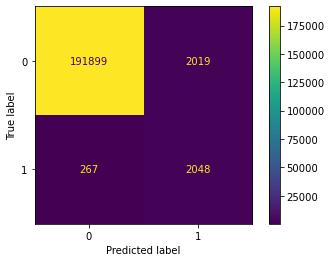

In [72]:
from sklearn.metrics import plot_confusion_matrix, classification_report, confusion_matrix,roc_auc_score
print("Classification Report for K-Nearest Neighbours: \n", classification_report(y_test, knn_predict))
print("Confusion Matrix of K-Nearest Neigbours: \n", confusion_matrix(y_test,knn_predict)) 
plot_confusion_matrix(knn, X_test, y_test)  
plt.show()

In [73]:
# %% Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=100,max_depth=8,random_state=42,
                                verbose=1,class_weight="balanced")

rf_clf.fit(X_res,y_res)


rf_pred = rf_clf.predict(X_test)

print("Classification Report for Random Forest Classifier: \n", classification_report(y_test, rf_pred))
print("Confusion Matrix of Random Forest Classifier: \n", confusion_matrix(y_test,rf_pred))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  2.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.6s finished


Classification Report for Random Forest Classifier: 
               precision    recall  f1-score   support

           0       1.00      0.96      0.98    193918
           1       0.23      0.98      0.38      2315

    accuracy                           0.96    196233
   macro avg       0.62      0.97      0.68    196233
weighted avg       0.99      0.96      0.97    196233

Confusion Matrix of Random Forest Classifier: 
 [[186355   7563]
 [    35   2280]]


C:\Users\Nab\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.6s finished


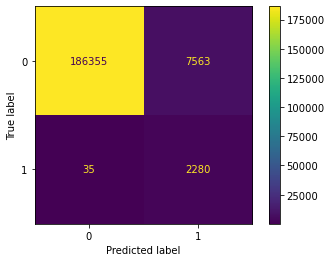

In [74]:
from sklearn.metrics import plot_confusion_matrix, accuracy_score
plot_confusion_matrix(rf_clf, X_test, y_test)  
plt.show()

In [75]:
from sklearn.metrics import accuracy_score
rf_acc = accuracy_score(rf_pred, y_test)
print("random forest test accuracy: {:.2f}%".format(rf_acc*100))
knn_acc=accuracy_score(knn_predict,y_test)
print("knn test accuracy: {:.2f}%".format(knn_acc*100))

random forest test accuracy: 96.13%
knn test accuracy: 98.84%


In [76]:
# applying logistic model 
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_res,y_res)
y_predict = lr.predict(X_test)
# Evaluation metrics 
from sklearn.metrics import confusion_matrix,classification_report
print("Classification Report for logistic regresssion : \n", classification_report(y_test, y_predict))

Classification Report for logistic regresssion : 
               precision    recall  f1-score   support

           0       1.00      0.95      0.98    193918
           1       0.19      0.88      0.31      2315

    accuracy                           0.95    196233
   macro avg       0.59      0.92      0.64    196233
weighted avg       0.99      0.95      0.97    196233



In [77]:
# XGBoost
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_res , y_res)
xgb_predict = xgb.predict(X_test)


In [78]:
from sklearn.metrics import confusion_matrix,classification_report
print("Classification Report for XGBoost : \n", classification_report(y_test, xgb_predict))

Classification Report for XGBoost : 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99    193918
           1       0.54      0.92      0.68      2315

    accuracy                           0.99    196233
   macro avg       0.77      0.96      0.84    196233
weighted avg       0.99      0.99      0.99    196233



C:\Users\Nab\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


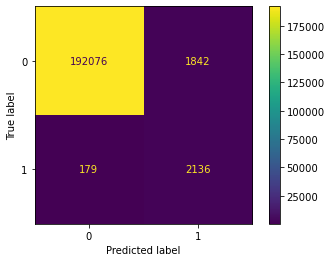

In [79]:
plot_confusion_matrix(xgb, X_test, y_test)  
plt.show()